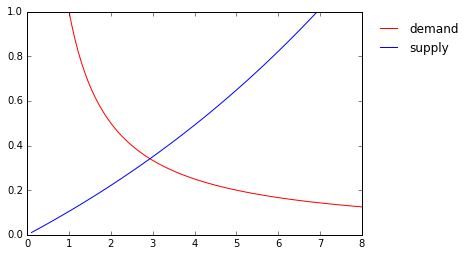

       a = 1        b = 0.1      epsilon = 1
              Equilibrium quantities        
  p = 2.93        Q_d = 0.34        Q_s = 0.34
              number of iterations: 23


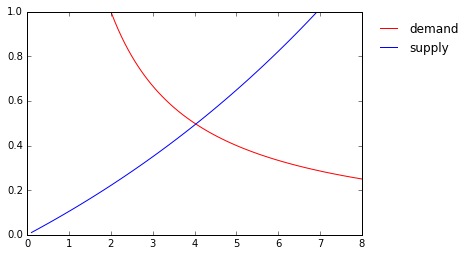

       a = 2        b = 0.1      epsilon = 1
              Equilibrium quantities        
  p = 4.03        Q_d = 0.50        Q_s = 0.50
              number of iterations: 23


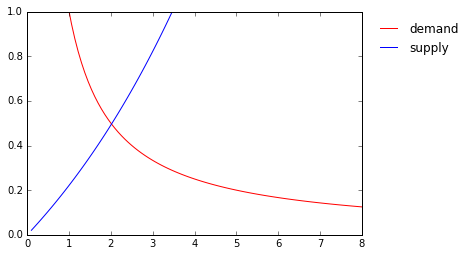

       a = 1        b = 0.2      epsilon = 1
              Equilibrium quantities        
  p = 2.01        Q_d = 0.50        Q_s = 0.50
              number of iterations: 23


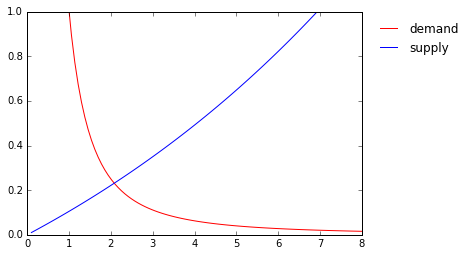

       a = 1        b = 0.1      epsilon = 2
              Equilibrium quantities        
  p = 2.08        Q_d = 0.23        Q_s = 0.23
              number of iterations: 23


In [49]:
# =============================================
# Comp Econ Homework Set 2
#
# Daniel Csaba UniID: dc2730
#
# Use bisection method to compute equilibirum 
# prices and quantities.
# ==============================================


%matplotlib inline
from numpy import e, linspace # Import only the neccessary functions
import matplotlib.pyplot as plt

# Pass all the parameters appearing in the problem
# for easier iteration when calling these functions
def  demand(price, a, b, epsilon):
    """Defines the demand curve as a function of price."""
    return a * (price ** -epsilon)
    

def supply(price, a, b, epsilon):
    """Defines the supply curve as a function of price."""
    return e ** (b * price) -1


def bisection(a, b, epsilon):
    """Bisection method for finding equilibrium price and quantity."""
    mxiter = 30 # Max number of iterations
    toler = 1.0e-6 # Tolerance level
    plow = 0.1 # Min price
    phigh = 10.0 # Max price
    
    # Start bisection to find equilibrium price and quantity
    for i in range(mxiter):
        pcur = (plow + phigh)/2
        yd = demand(pcur, a, b, epsilon)
        ys = supply(pcur, a, b, epsilon)
        niter = mxiter
        
        if ys - yd > 0:
            phigh = pcur
        else:
            plow = pcur
            
        if abs(phigh - plow) <= toler:
            niter = i
            break
    
    pclear = (plow + phigh)/2
    yd = demand(pcur, a, b, epsilon)
    ys = supply(pcur, a, b, epsilon)
    excesssupply = ys -yd
    print('================================================')
    print('       a = {}        b = {}      epsilon = {}'.format(a, b, epsilon))
    print('================================================')
    print('              Equilibrium quantities        ')
    print('  p = {:.2f}        Q_d = {:.2f}        Q_s = {:.2f}'.format(pcur, yd, ys))
    print('================================================')
    print('              number of iterations: {}'.format(niter))

# Plot curves and compute equilibrium quantities for 
# parameter values collected in d
d = [[1, 0.1, 1], [2, 0.1, 1], [1, 0.2, 1], [1, 0.1, 2]]
p = linspace(0.1, 8, 100)
for params in d:
    plt.plot(p, demand(p, *params), '-r', label='demand')
    plt.plot(p, supply(p, *params), '-b', label='supply')
    plt.xlim([0,8.0])
    plt.ylim([0,1.0])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, frameon = False)
    plt.show()
    bisection(*params)